**Importing** **Librabries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset into Environment

In [2]:
data= pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Data Preprocessing**

In [5]:
# Drop Unnecessary variables
data.drop(['Region', 'Channel'], axis=1, inplace=True)

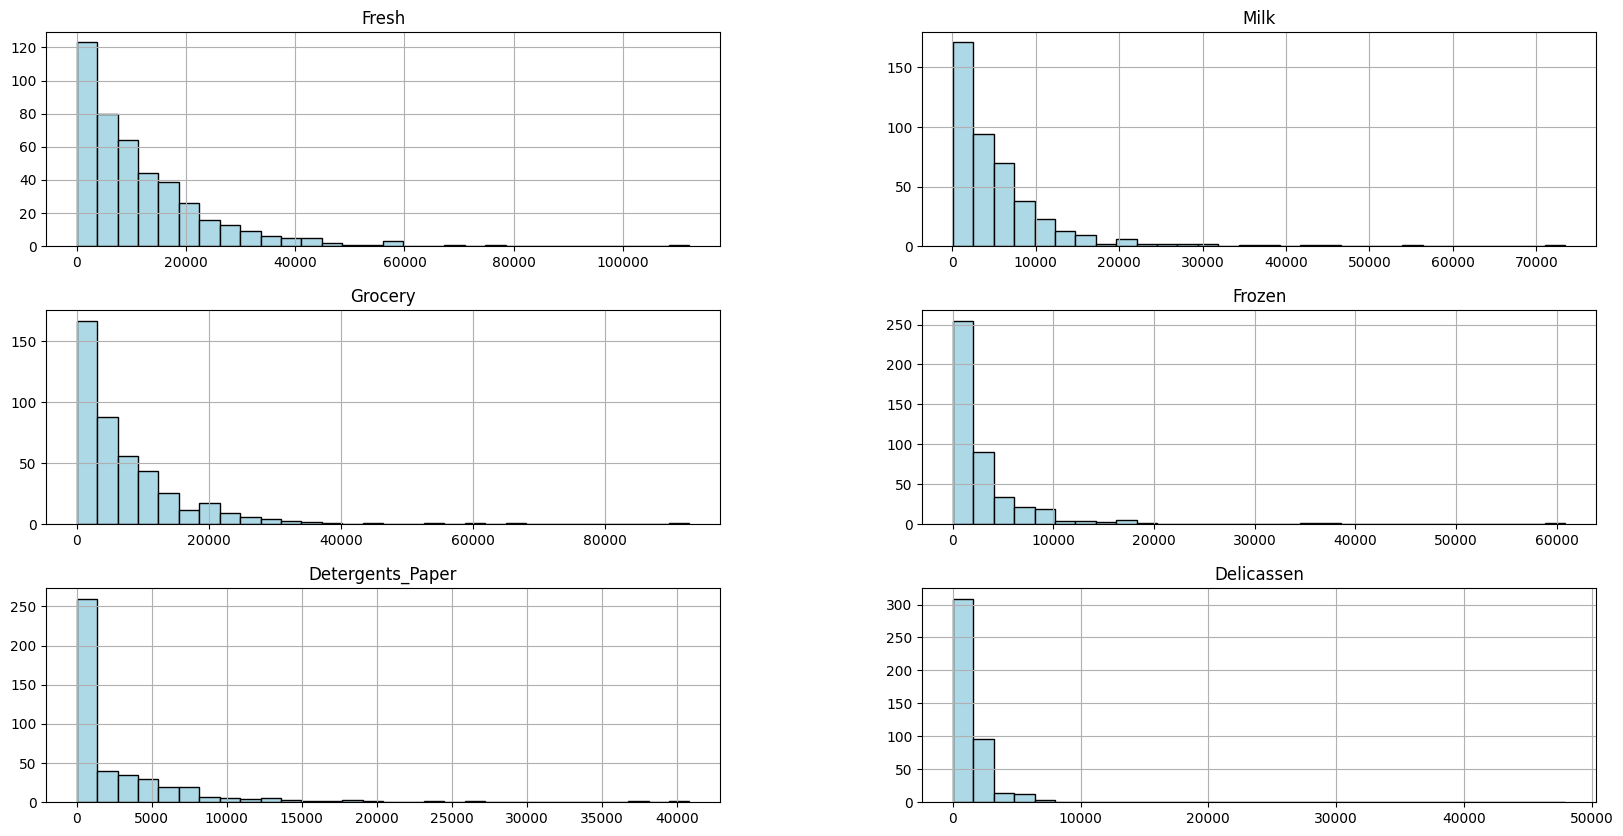

In [6]:
data.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

Box Plots

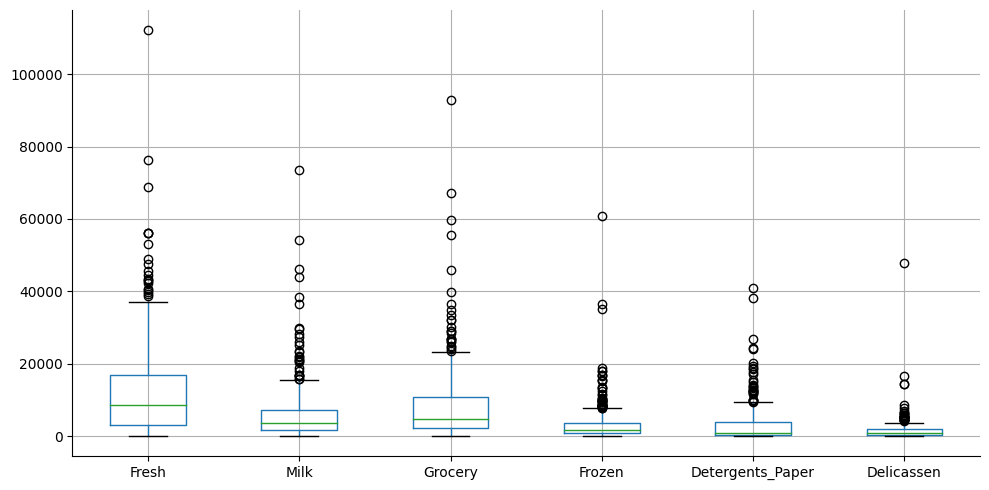

In [7]:
plt.figure(figsize=(10, 5))
data.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

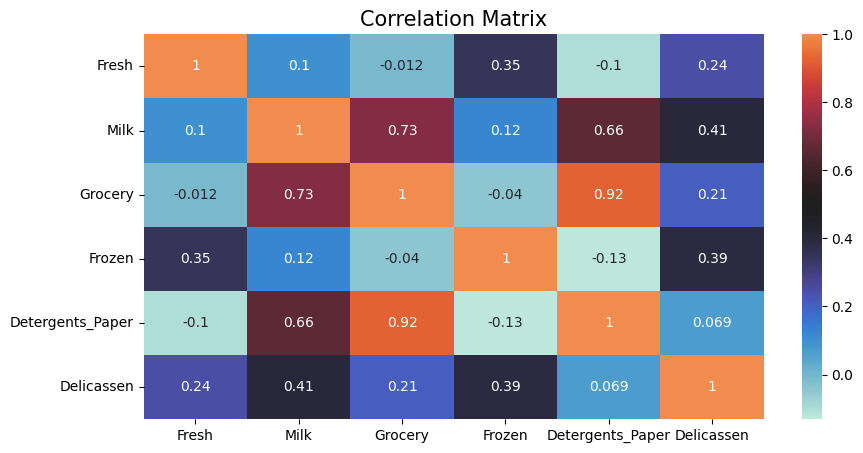

In [8]:
#Correlation
corr=data.corr()
plt.figure(figsize=(10,5))
plt.title('Correlation Matrix',fontsize=15)
sns.heatmap(corr, center=0.5,annot=True)
plt.show()

Outlier Handling

In [9]:
for i in data.keys():
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

for i in data.keys():
    q25, q75 = np.percentile(data[i], [25,75])
    iqr = q75 - q25

    lower_bound = q25 - iqr*1.5
    upper_bound = q75 + iqr*1.5

    data.loc[data[i] < lower_bound, i] = lower_bound
    data.loc[data[i] > upper_bound, i] = upper_bound

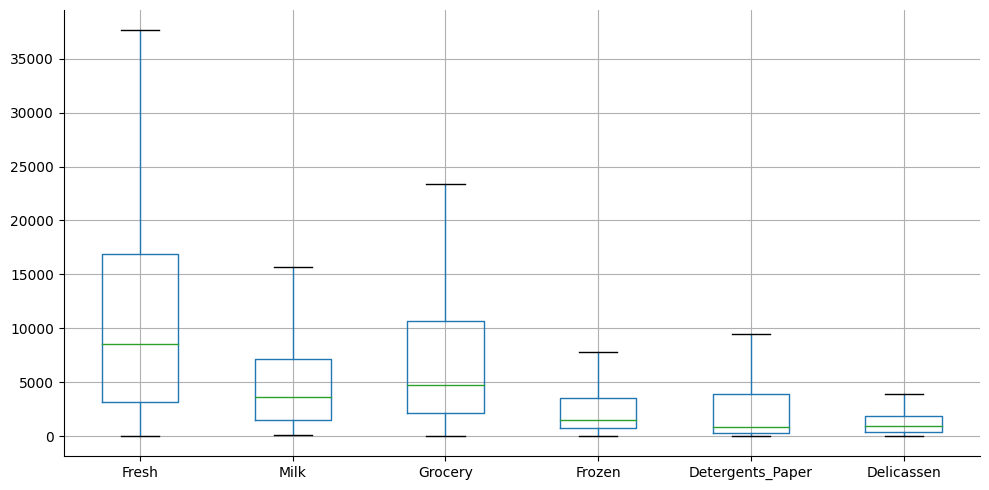

In [10]:
#Boxplot
plt.figure(figsize=(10, 5))
data.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

In [11]:
x= data

**K-Means** **Clustering**

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=20,init='k-means++')
  km.fit(x)
  css= km.inertia_
  wcss.append(css)

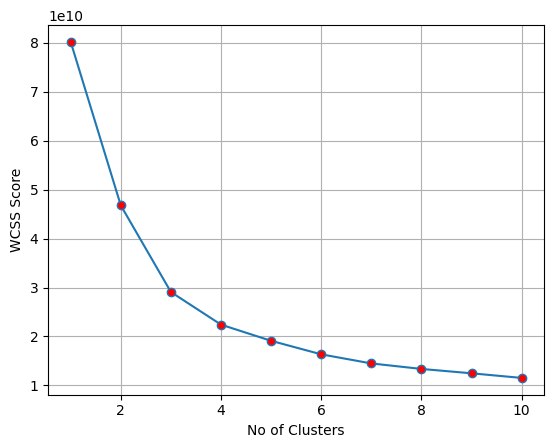

In [14]:
plt.plot(range(1,11),wcss,marker="o",markerfacecolor="red")
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

In [15]:
km=KMeans(n_clusters=5,n_init=10,init='k-means++', random_state=42)

In [16]:
km.fit(x)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [17]:
labels = km.predict(x)
labels

array([1, 4, 4, 1, 1, 4, 1, 4, 0, 3, 4, 1, 2, 1, 2, 0, 4, 0, 1, 4, 1, 0,
       2, 2, 2, 1, 0, 1, 3, 2, 1, 0, 1, 2, 0, 4, 2, 4, 3, 2, 2, 1, 4, 3,
       4, 3, 3, 2, 4, 3, 0, 0, 2, 4, 2, 0, 3, 4, 1, 4, 4, 2, 4, 3, 0, 3,
       0, 1, 0, 0, 1, 3, 0, 1, 4, 1, 0, 3, 0, 0, 0, 4, 4, 1, 1, 3, 3, 2,
       0, 2, 1, 1, 3, 1, 4, 0, 4, 0, 0, 0, 4, 3, 4, 2, 1, 1, 4, 3, 4, 3,
       1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 4, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 4, 4, 1, 0, 1, 2, 2, 0, 1, 3, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 3, 4, 1, 4, 4, 4, 1, 1, 3, 4, 3, 4, 0, 0, 0, 4, 3, 4, 3, 0, 4,
       2, 1, 1, 0, 1, 2, 4, 2, 0, 0, 0, 4, 4, 4, 1, 1, 0, 3, 0, 1, 2, 4,
       1, 0, 3, 3, 2, 0, 0, 3, 0, 4, 0, 3, 1, 3, 0, 4, 4, 4, 3, 1, 4, 0,
       1, 4, 0, 0, 0, 1, 1, 0, 0, 0, 1, 4, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 4, 4, 0, 1, 1, 0, 0, 3, 0, 2, 4, 2, 1, 0, 2, 2, 0, 0, 1, 0,
       4, 4, 3, 1, 3, 1, 0, 0, 4, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 0, 4, 1, 0, 1, 0, 4, 0, 1,

In [18]:
pd.Series(labels).value_counts()

0    144
1    107
4     80
2     58
3     51
dtype: int64

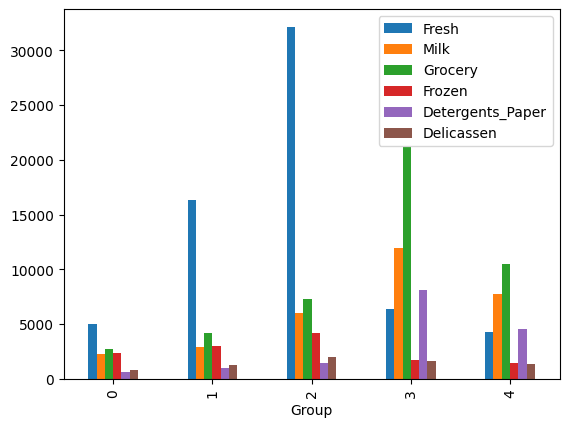

In [19]:
# barplot  showing features in each cluster

df = pd.DataFrame(x)
df['Group'] = labels
dfGroup = df.groupby('Group').aggregate('mean')
dfGroup.plot.bar()
plt.show()

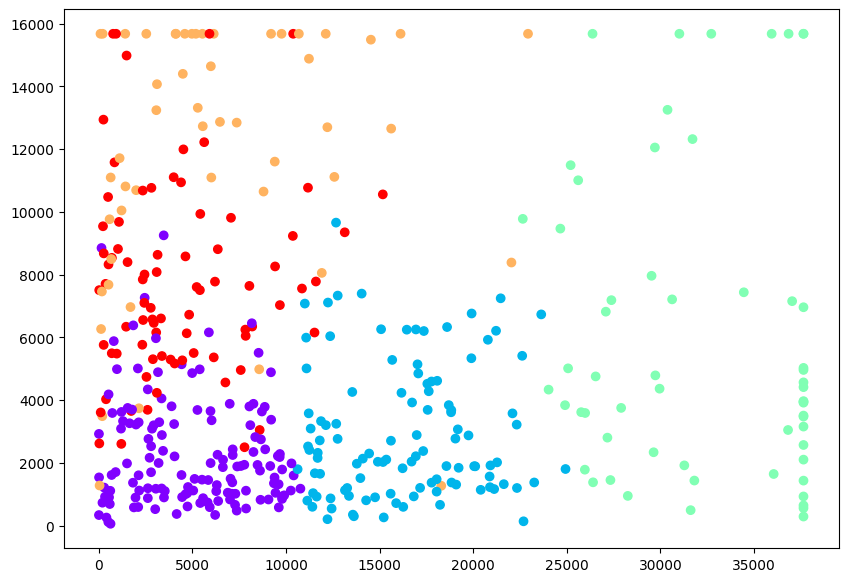

In [20]:
# scatter plot

plt.figure(figsize=(10,7))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=labels,cmap='rainbow')
plt.show()


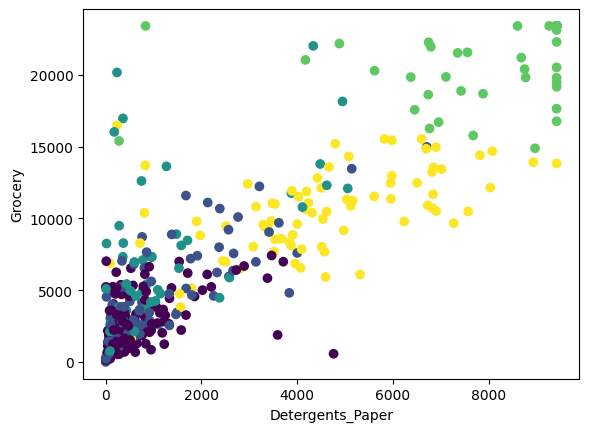

In [21]:
plt.scatter(x['Detergents_Paper'],x['Grocery'],c= labels)
plt.xlabel('Detergents_Paper')
plt.ylabel('Grocery')
plt.title('')
plt.show()

In [22]:
kmeans_labels = km.labels_

Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
sil_score= silhouette_score(x,km.labels_)
sil_score

0.33905099855710685

**Aggolomerative Hierarachiacal Clustering**

In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [26]:
mergings = linkage(x,method='ward')

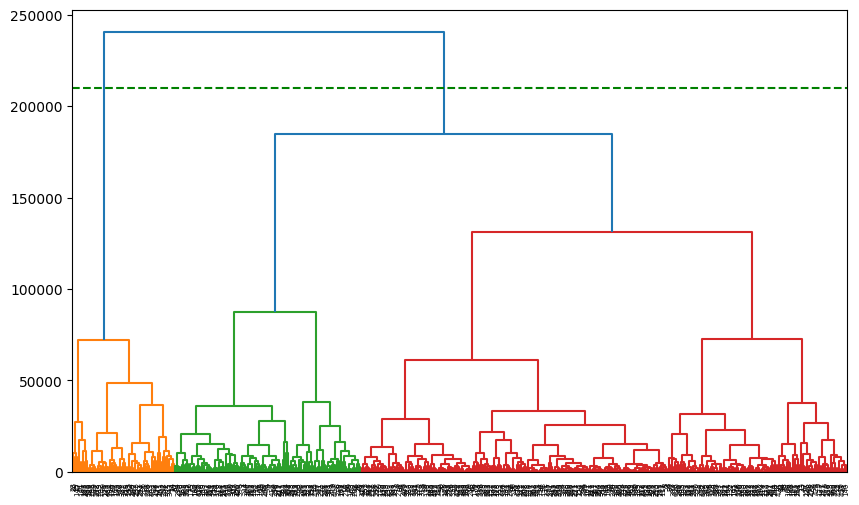

In [27]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(210000,color='green', linestyle='--')
plt.show()

In [28]:
cluster_labels_hc=fcluster(mergings,210000,criterion='distance')

In [29]:
print(cluster_labels_hc.max())

2


In [30]:
cluster_labels_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Silhouette Score

In [31]:
sil_score= silhouette_score(x,cluster_labels_hc)
sil_score

0.4670984060764663

**DBSCAN Clustering**

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='cosine', )
dbscan.fit(x)
labels_dbscan = dbscan.labels_


In [34]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

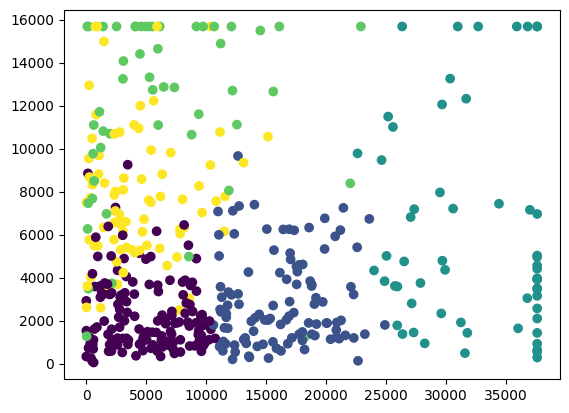

In [35]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels, cmap='viridis')
plt.show()

In [36]:
np.unique(labels_dbscan)

array([-1,  0])

In [37]:
sil_score= silhouette_score(x,labels_dbscan)
sil_score

-0.10368847179176437

**PCA**

In [38]:
x.var()

Fresh               1.042756e+08
Milk                1.924030e+07
Grocery             4.351425e+07
Frozen              5.799898e+06
Detergents_Paper    8.648270e+06
Delicassen          1.173040e+06
Group               2.225637e+00
dtype: float64

Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
x = scaler.fit_transform(data)

In [41]:
x = pd.DataFrame(x,index=data.index,columns=data.columns)

In [42]:
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,-0.390440
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,1.622766
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,1.622766
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,-0.390440
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,-0.390440
...,...,...,...,...,...,...,...
435,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381,0.280629
436,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640,0.280629
437,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875,0.951697
438,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358,-1.061509


In [43]:
from sklearn.decomposition import PCA

In [44]:
pc = PCA()
pc_array = pc.fit_transform(x)
pc_array

array([[ 0.51002118, -0.33757418,  0.31217699, ...,  0.73919157,
         0.87232462, -0.23929892],
       [ 1.74159334, -0.05453529,  0.05131927, ..., -1.03155726,
         0.61282456,  0.0081532 ],
       [ 1.9007919 ,  1.06436635, -0.71841454, ..., -1.4159757 ,
         0.09964706, -0.29195655],
       ...,
       [ 4.20263815, -0.0254721 ,  0.42595981, ...,  1.26143989,
         0.14985335, -0.13533848],
       [-1.3437287 , -0.01421827, -0.24389812, ...,  0.26682847,
        -0.08821892, -0.03815015],
       [-1.58581164, -1.71072023, -0.00481269, ...,  0.34965436,
         0.18603045,  0.07405053]])

In [45]:
pc_array.shape

(440, 7)

In [46]:
pc_array = pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,0.510021,-0.337574,0.312177,0.602724,0.739192,0.872325,-0.239299
1,1.741593,-0.054535,0.051319,0.224429,-1.031557,0.612825,0.008153
2,1.900792,1.064366,-0.718415,1.580817,-1.415976,0.099647,-0.291957
3,-1.246039,1.274389,-0.802350,-0.408746,-0.383203,-0.531371,0.147747
4,0.106050,2.317395,-0.339602,1.475194,0.248469,-0.341328,-0.103218
...,...,...,...,...,...,...,...
435,0.997994,3.108826,-0.080798,-0.992545,0.494564,0.922917,1.003299
436,-1.249027,2.547006,1.431335,0.314133,-0.492010,-0.390385,-0.280225
437,4.202638,-0.025472,0.425960,0.000675,1.261440,0.149853,-0.135338
438,-1.343729,-0.014218,-0.243898,1.354617,0.266828,-0.088219,-0.038150


In [47]:
pc.explained_variance_

array([3.32341961, 1.62147466, 0.67303511, 0.63369967, 0.38472944,
       0.28058721, 0.09899963])

In [48]:
pc.explained_variance_ratio_*100

array([47.3695198 , 23.1112785 ,  9.59293553,  9.03227775,  5.48364363,
        3.99927867,  1.41106612])

In [49]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
pc1,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
pc2,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0
pc3,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0
pc4,0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0
pc5,-0.0,0.0,-0.0,-0.0,1.0,0.0,0.0
pc6,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0
pc7,0.0,-0.0,0.0,-0.0,0.0,0.0,1.0


In [50]:
pc1 = PCA(n_components=4)

In [51]:
pc1_array = pc1.fit_transform(x)
pc1_array = pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4'])
pc1_array

,pc1,pc2,pc3,pc4
0,0.510021,-0.337574,0.312177,0.602724
1,1.741593,-0.054535,0.051319,0.224429
2,1.900792,1.064366,-0.718415,1.580817
3,-1.246039,1.274389,-0.802350,-0.408746
4,0.106050,2.317395,-0.339602,1.475194
...,...,...,...,...
435,0.997994,3.108826,-0.080798,-0.992545
436,-1.249027,2.547006,1.431335,0.314133
437,4.202638,-0.025472,0.425960,0.000675
438,-1.343729,-0.014218,-0.243898,1.354617


In [52]:
pc1.explained_variance_ratio_*100

array([47.3695198 , 23.1112785 ,  9.59293553,  9.03227775])

K-Means after PCA

In [53]:
wcss=[]
for i in range(1,11):
  km_pc=KMeans(n_clusters=i,n_init=10,init='k-means++')
  km_pc.fit(pc1_array)
  css= km_pc.inertia_
  wcss.append(css)

In [54]:
wcss

[2744.4651566768334,
 1540.5353527072632,
 1167.5206611329068,
 996.8845873065272,
 840.264471877196,
 743.5460981848787,
 655.5088527348025,
 590.3168405272571,
 540.3605234446576,
 497.13114434775133]

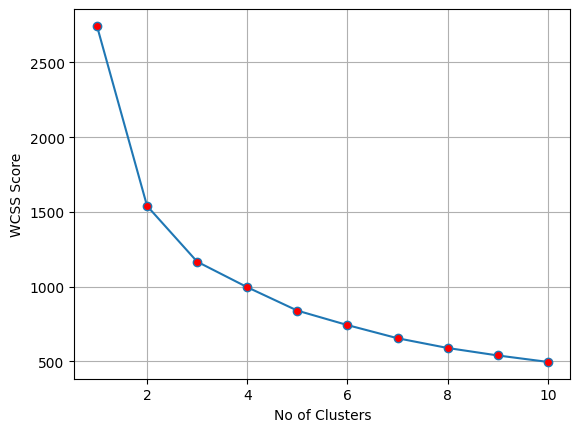

In [55]:
plt.plot(range(1,11),wcss,marker="o",markerfacecolor="red")
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

In [56]:
 km_pc=KMeans(n_clusters=5,n_init=10,init='k-means++')

In [57]:
km_pc.fit(pc1_array)

KMeans(n_clusters=5, n_init=10)

In [58]:
labels_km_pc= km_pc.predict(pc1_array)

In [59]:
labels_km_pc

array([2, 1, 0, 4, 3, 1, 2, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 3, 1, 3, 2,
       3, 0, 0, 2, 2, 2, 0, 3, 3, 2, 2, 3, 2, 1, 3, 1, 1, 3, 3, 3, 1, 1,
       1, 0, 1, 0, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1,
       2, 1, 4, 2, 4, 0, 4, 4, 1, 4, 4, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 3,
       4, 3, 2, 4, 0, 4, 1, 2, 1, 2, 2, 4, 0, 1, 1, 3, 2, 2, 1, 1, 1, 1,
       2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 3, 4, 3, 2, 3, 4, 2,
       2, 2, 2, 2, 1, 1, 3, 2, 3, 3, 3, 4, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1,
       3, 3, 2, 4, 3, 0, 1, 0, 2, 2, 2, 1, 1, 1, 4, 2, 2, 1, 2, 4, 3, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 3, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 1, 4, 4, 2, 2, 3, 2, 2, 4, 4, 1, 3, 2, 3, 2, 2, 4, 2, 3, 4, 3,
       2, 2, 1, 1, 2, 2, 2, 4, 2, 0, 4, 3, 0, 3, 2, 4, 3, 3, 2, 4, 2, 2,
       1, 0, 1, 3, 1, 2, 4, 2, 1, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 4, 3, 3,
       2, 4, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 3,

In [60]:
sil_score= silhouette_score(pc1_array,labels_km_pc)
sil_score

0.3715232142370903

 dbscan on pc1_array

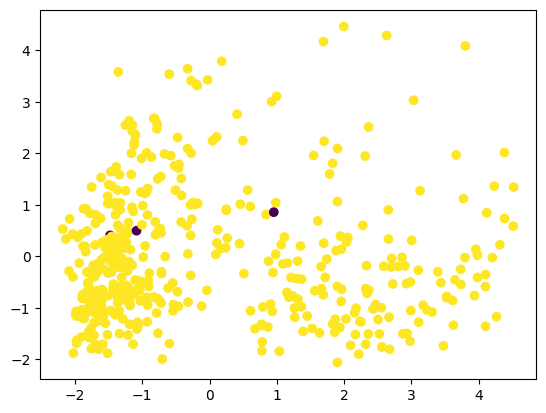

In [61]:
#  dbscan on pc1_array

dbscan = DBSCAN(eps=0.1, min_samples=5, metric='cosine', )
dbscan.fit(pc1_array)
labels_dbscan = dbscan.labels_

num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
plt.scatter(pc1_array.iloc[:, 0], pc1_array.iloc[:, 1], c=labels_dbscan, cmap='viridis')
plt.show()

In [62]:
np.unique(labels_dbscan)

array([-1,  0])

In [63]:
#Silhoutte Score
sil_score= silhouette_score(pc1_array,labels_dbscan)
sil_score

-0.07976236059178372

Hierarchical Clustering after PCA

In [64]:
mergings_pc = linkage(pc1_array,method='ward')

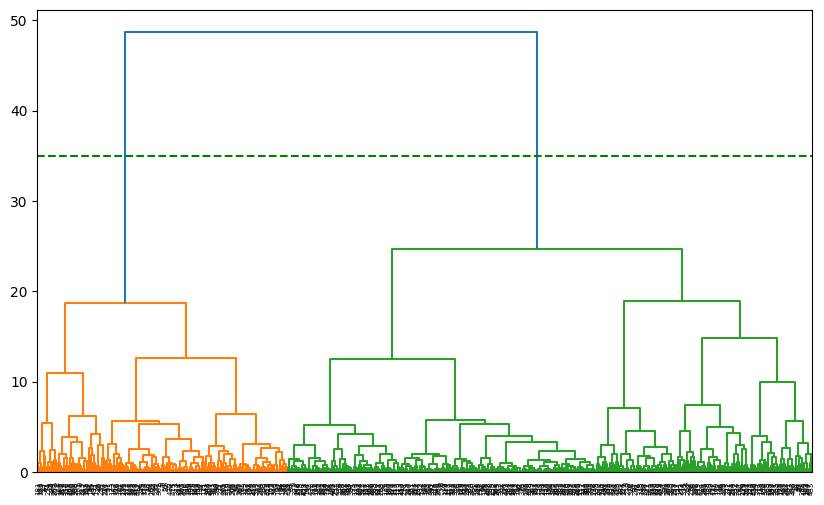

In [65]:
plt.figure(figsize=(10,6))
dendrogram(mergings_pc)
plt.axhline(35,color='green', linestyle='--')
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
# Fit the model to the data
hc.fit(pc1_array)
labels_hc = hc.fit_predict(pc1_array)

In [67]:
# Calculate the silhouette score
sil_score = silhouette_score(pc1_array, labels_hc)
sil_score

0.4260946393362894

In [68]:
#with different linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, linkage='average', metric='euclidean')
# Fit the model to the data
hc.fit(pc1_array)
labels_hc = hc.fit_predict(pc1_array)
# Calculate the silhouette score
sil_score = silhouette_score(pc1_array, labels_hc)
sil_score

0.42608253445459915